<a href="https://colab.research.google.com/github/aqu7he/DS-4002-Group-5-Project-2/blob/main/seaice_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

file_north = '/content/N_seaice_extent_daily_v3.0.csv'
north = pd.read_csv(file_north)
file_south = '/content/S_seaice_extent_daily_v3.0.csv'
south = pd.read_csv(file_south)
north.head(20000)

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
...,...,...,...,...,...,...
14919,2024,03,07,14.784,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.03.06/NSIDC0...
14920,2024,03,08,14.828,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.03.07/NSIDC0...
14921,2024,03,09,14.879,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.03.08/NSIDC0...
14922,2024,03,10,14.968,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.03.09/NSIDC0...


In [2]:
north.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

In [3]:
south.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

In [4]:
north['Year'].value_counts()
# 1989 first year w/ one log per day, could cut dataset along that line if needed

2000    366
2008    366
2020    366
2004    366
2016    366
1996    366
2012    366
1992    366
2002    365
2003    365
2005    365
2006    365
2007    365
2001    365
2009    365
2023    365
2011    365
2013    365
2014    365
2015    365
2017    365
2018    365
2019    365
2010    365
1999    365
2022    365
1991    365
1998    365
1989    365
1990    365
2021    365
1993    365
1994    365
1995    365
1997    365
1988    354
1987    220
1986    183
1984    183
1983    183
1981    183
1980    183
1985    182
1982    182
1979    182
2024     71
1978     34
YYYY      1
Name: Year, dtype: int64

In [18]:
# remove top row (not an observation, more of a key)
north = north.drop(0)
# fix funny spaces in column names
north = north.rename(columns={' Month': 'Month', ' Day':'Day', '     Extent':'Extent'})
# create single standardized datetime var, drop year/month/day
north['Datetime'] = pd.to_datetime(north[['Year','Month','Day']])
north = north.drop(['Year', 'Month', 'Day', '    Missing', ' Source Data'], axis=1)
north.head(1500)

,Extent,Datetime
1,10.231,1978-10-26
2,10.420,1978-10-28
3,10.557,1978-10-30
4,10.670,1978-11-01
5,10.777,1978-11-03
...,...,...
1496,14.305,1987-01-02
1497,14.417,1987-01-04
1498,14.515,1987-01-06
1499,14.688,1987-01-08


In [19]:
# same for south
# remove top row (not an observation, more of a key)
south = south.drop(0)
# fix funny spaces in column names
south = south.rename(columns={' Month': 'Month', ' Day':'Day', '     Extent':'Extent'})
# create single standardized datetime var, drop year/month/day
south['Datetime'] = pd.to_datetime(south[['Year','Month','Day']])
south = south.drop(['Year', 'Month', 'Day', '    Missing', ' Source Data'], axis=1)
south.head(1500)

,Extent,Datetime
1,17.624,1978-10-26
2,17.803,1978-10-28
3,17.670,1978-10-30
4,17.527,1978-11-01
5,17.486,1978-11-03
...,...,...
1496,6.765,1987-01-02
1497,6.458,1987-01-04
1498,6.287,1987-01-06
1499,5.981,1987-01-08


In [20]:
# join south and north on date
combined = pd.merge(north, south, on='Datetime')
combined = combined.rename(columns={'Extent_x':'Extent_north','Extent_y':'Extent_south'})
combined.head(1500)

,Extent_north,Datetime,Extent_south
0,10.231,1978-10-26,17.624
1,10.420,1978-10-28,17.803
2,10.557,1978-10-30,17.670
3,10.670,1978-11-01,17.527
4,10.777,1978-11-03,17.486
...,...,...,...
1495,14.305,1987-01-02,6.765
1496,14.417,1987-01-04,6.458
1497,14.515,1987-01-06,6.287
1498,14.688,1987-01-08,5.981


In [21]:
combined['Extent_north'] = combined['Extent_north'].astype(float)
combined['Extent_south'] = combined['Extent_south'].astype(float)

In [22]:
combined['Extent_total'] = combined['Extent_north']+combined['Extent_south']
combined.head(1500)

,Extent_north,Datetime,Extent_south,Extent_total
0,10.231,1978-10-26,17.624,27.855
1,10.420,1978-10-28,17.803,28.223
2,10.557,1978-10-30,17.670,28.227
3,10.670,1978-11-01,17.527,28.197
4,10.777,1978-11-03,17.486,28.263
...,...,...,...,...
1495,14.305,1987-01-02,6.765,21.070
1496,14.417,1987-01-04,6.458,20.875
1497,14.515,1987-01-06,6.287,20.802
1498,14.688,1987-01-08,5.981,20.669


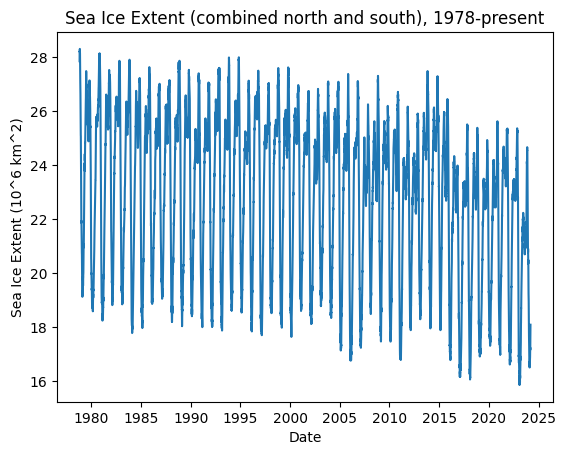

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Datetime', y='Extent_total', data=combined)
plt.title('Sea Ice Extent (combined north and south), 1978-present')
plt.xlabel('Date')
plt.ylabel('Sea Ice Extent (10^6 km^2)')
plt.show()

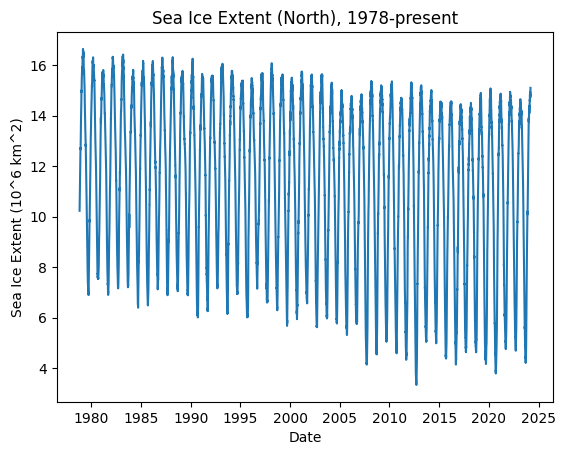

In [24]:
sns.lineplot(x='Datetime', y='Extent_north', data=combined)
plt.title('Sea Ice Extent (North), 1978-present')
plt.xlabel('Date')
plt.ylabel('Sea Ice Extent (10^6 km^2)')
plt.show()

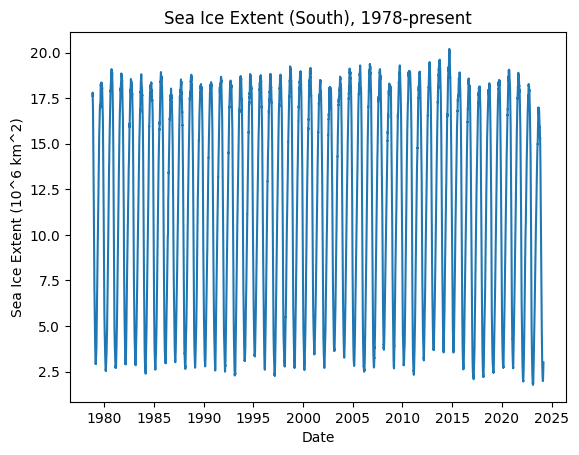

In [25]:
sns.lineplot(x='Datetime', y='Extent_south', data=combined)
plt.title('Sea Ice Extent (South), 1978-present')
plt.xlabel('Date')
plt.ylabel('Sea Ice Extent (10^6 km^2)')
plt.show()

In [26]:
# briefly show truncated graph to show more clearly
combined_2010s = combined[combined['Datetime'].dt.year > 2010]
combined_2010s.head(100)

,Extent_north,Datetime,Extent_south,Extent_total
10104,12.896,2011-01-01,6.843,19.739
10105,12.915,2011-01-02,6.693,19.608
10106,12.926,2011-01-03,6.554,19.480
10107,13.051,2011-01-04,6.384,19.435
10108,13.176,2011-01-05,6.241,19.417
...,...,...,...,...
10199,14.350,2011-04-06,4.868,19.218
10200,14.397,2011-04-07,5.034,19.431
10201,14.254,2011-04-08,5.127,19.381
10202,14.220,2011-04-09,5.317,19.537


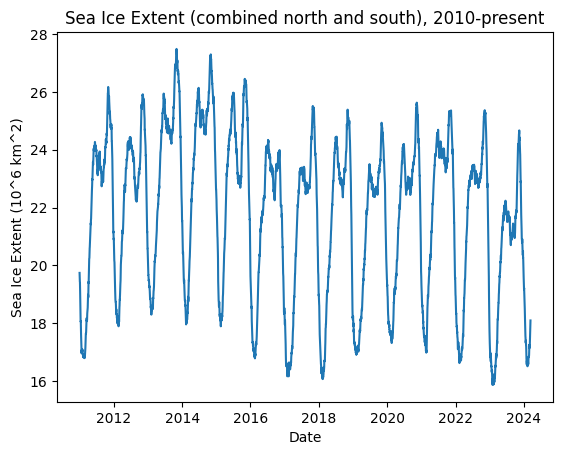

In [27]:
sns.lineplot(x='Datetime', y='Extent_total', data=combined_2010s)
plt.title('Sea Ice Extent (combined north and south), 2010-present')
plt.xlabel('Date')
plt.ylabel('Sea Ice Extent (10^6 km^2)')
plt.show()

In [28]:
combined['Extent_total'].describe()

count    14923.000000
mean        22.808374
std          2.935029
min         15.862000
25%         20.307000
50%         23.450000
75%         25.185500
max         28.311000
Name: Extent_total, dtype: float64

In [29]:
combined_2010s['Extent_total'].describe()

# can see that mean is significantly lower, with similar standard deviation

count    4819.000000
mean       21.847822
std         2.807848
min        15.862000
25%        19.466500
50%        22.686000
75%        23.981000
max        27.490000
Name: Extent_total, dtype: float64

In [18]:
# just out of curiosity

lowest_values = combined.sort_values(by='Extent_total')
highest_values = combined.sort_values(by='Extent_total', ascending=False)
print(lowest_values.head(10))
print(highest_values.head(10))

       Extent_north   Datetime  Extent_south  Extent_total
14517        13.640 2023-01-31         2.222        15.862
14527        13.984 2023-02-10         1.897        15.881
14529        14.024 2023-02-12         1.864        15.888
14516        13.670 2023-01-30         2.249        15.919
14518        13.752 2023-02-01         2.178        15.930
14514        13.635 2023-01-28         2.319        15.954
14536        14.194 2023-02-19         1.766        15.960
14528        14.047 2023-02-11         1.916        15.963
14530        14.132 2023-02-13         1.871        16.003
14515        13.684 2023-01-29         2.323        16.007
     Extent_north   Datetime  Extent_south  Extent_total
5          10.968 1978-11-05        17.343        28.311
4          10.777 1978-11-03        17.486        28.263
6          11.080 1978-11-07        17.157        28.237
2          10.557 1978-10-30        17.670        28.227
1          10.420 1978-10-28        17.803        28.223
7        

In [28]:
combined.to_csv('seaice_data.csv', index=False)